In [1]:
'''prepare data for librosa extracted features for train and test'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, Imputer, LabelEncoder

In [2]:
def read_data_librosa(datafile,selected_features=None):
    data = pd.read_csv(datafile)
    if selected_features is not None:
        feature = data.loc[:,selected_features]
    else:
        feature = data.loc[:, 'tempo':]
    labels = data.loc[:, 'class']
    scaler = StandardScaler()
    features_scaled = scaler.fit(feature).transform(feature)
    return features_scaled, labels

In [3]:
'''test read data with selected features'''
data = './librosa_trainingdata/trainingdata_librosa.csv'
selected_features = ['mfcc_delta_mean','mfcc_delta_var','mfcc_delta_std']
feature,label = read_data_librosa(data,selected_features)
print("one============")
print(feature[0])

one============
[-0.98401954  0.51343197  0.622218  ]


In [4]:
'''test read data all features, i.e. take all features extracted'''
data = './librosa_trainingdata/trainingdata_librosa.csv'
feature,label = read_data_librosa(data)
print("one============")
print(feature[0])
print(len(feature[0]))

one============
[-1.71549375e+00 -1.55494180e+00 -4.21868117e-01 -5.60715383e-01
  7.21180326e-02  5.66318174e-02 -1.58538606e+00  1.15862582e+00
  1.19568094e+00 -1.70896707e+00  1.51234694e+00  1.67234821e+00
  9.89407354e-01  1.13943818e+00  9.88975936e-01  4.56556500e-01
  5.81006848e-01  4.18328396e-01 -9.84019545e-01  6.22217999e-01
  5.13431967e-01  8.66007957e-01  5.74514962e-01  4.32768370e-01
 -1.83836504e+00 -1.01671456e+00 -1.00346514e+00 -1.81080349e+00
 -5.64007512e-01 -6.36719371e-01  1.59085929e+00  4.91858810e+00
  5.63949877e+00 -1.91235754e+00 -7.91959501e-01 -8.42170796e-01
  1.57293633e-03 -1.08275933e-01 -2.88862412e-01  1.51120307e+00
  1.53931927e+00  1.70661463e+00 -1.52397854e+00 -1.00457286e+00
 -9.83266065e-01  1.59650881e-03  1.69764570e+00  2.01987421e+00
 -2.50170231e-01 -5.56472349e-01 -6.51549652e-01 -8.04946837e-01
 -7.30241710e-01 -5.21131634e-01]
54


highest k is:  8
highest score is:  50.0


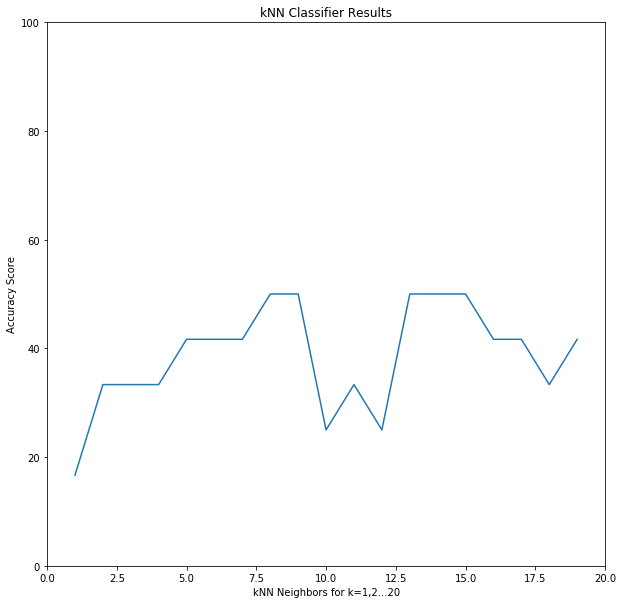

In [5]:
'''
    Using KNN model with all features
'''
data = './librosa_trainingdata/trainingdata_librosa.csv'

feature, label = read_data_librosa(data)

test_size = 0.10
random_seed = 42
train_d, test_d, train_l, test_l = train_test_split(feature, label, test_size=test_size, random_state=random_seed)

result = []
xlabel = [i for i in range(1, 20)]
highest_k1 = 0
highest_score1 = 0
for neighbors in range(1, 20):
    kNN = KNeighborsClassifier(n_neighbors=neighbors)
    kNN.fit(train_d, train_l)
    prediction = kNN.predict(test_d)
    score = accuracy_score(prediction, test_l)*100
    result.append(score)
    if score > highest_score1:
        highest_score1 = score
        highest_k1 = neighbors
        
print("highest k is: ", highest_k1) 
print("highest score is: ", highest_score1)

plt.figure(figsize=(10, 10))
plt.xlabel('kNN Neighbors for k=1,2...20')
plt.ylabel('Accuracy Score')
plt.title('kNN Classifier Results')
plt.ylim(0, 100)
plt.xlim(0, xlabel[len(xlabel)-1]+1)
plt.plot(xlabel, result)
plt.savefig('Librosa-knn-allfeatures.png')
plt.show()

highest k is:  4
highest score is:  58.333333333333336


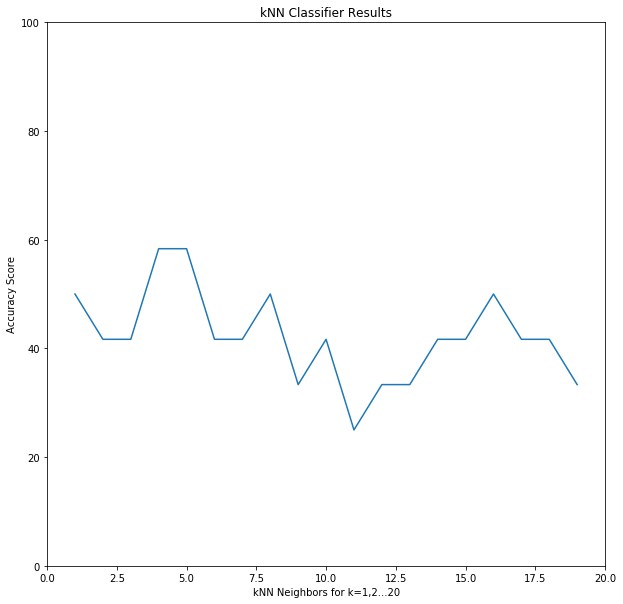

In [6]:
'''
    Using KNN model with selected features
'''
data = './librosa_trainingdata/trainingdata_librosa.csv'

selected_features = [#'tempo',
                     #'total_beats',
                     'chroma_cens_mean','chroma_cens_std','chroma_cens_var',
                     'mfcc_mean','mfcc_var','mfcc_std',
                     'cent_var','cent_mean','cent_std',
                     'contrast_mean','contrast_var','contrast_std',
                     'rolloff_mean','rolloff_std','rolloff_var',
                     #'zcr_mean','zcr_std','zcr_var'
                    ]
feature,label = read_data_librosa(data,selected_features)

test_size = 0.10
random_seed = 42
train_d, test_d, train_l, test_l = train_test_split(feature, label, test_size=test_size, random_state=random_seed)

result = []
xlabel = [i for i in range(1, 20)]
highest_k2 = 0
highest_score2 = 0
for neighbors in range(1, 20):
    kNN = KNeighborsClassifier(n_neighbors=neighbors)
    kNN.fit(train_d, train_l)
    prediction = kNN.predict(test_d)
    score = accuracy_score(prediction, test_l)*100
    result.append(score)
    if score > highest_score2:
        highest_score2 = score
        highest_k2 = neighbors
        
print("highest k is: ", highest_k2) 
print("highest score is: ", highest_score2)

plt.figure(figsize=(10, 10))
plt.xlabel('kNN Neighbors for k=1,2...20')
plt.ylabel('Accuracy Score')
plt.title('kNN Classifier Results')
plt.ylim(0, 100)
plt.xlim(0, xlabel[len(xlabel)-1]+1)
plt.plot(xlabel, result)
plt.savefig('Librosa-knn-selectedfeatures.png')
plt.show()

In [7]:
'''KNN model with cross validation -- all features'''
data = './librosa_trainingdata/trainingdata_librosa.csv'
feature,label = read_data_librosa(data)
clf = KNeighborsClassifier(n_neighbors = highest_k1)
scores = cross_val_score(clf,feature,label,cv=5)
print(scores.mean())

0.439227931488801


In [8]:
'''KNN model with cross validation -- selected features'''
data = './librosa_trainingdata/trainingdata_librosa.csv'
feature,label = read_data_librosa(data,selected_features)
clf = KNeighborsClassifier(n_neighbors = highest_k2)
scores = cross_val_score(clf,feature,label,cv=5)
print(scores.mean())

0.3849262187088274


In [9]:
'''Using SVC model with all features'''
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

data = './librosa_trainingdata/trainingdata_librosa.csv'
feature, label = read_data_librosa(data)

x_for_kfold = feature
kfold = KFold(n_splits = 5)
train_index_start = []
train_index_end = []
test_index_start =[]
test_index_end = []
for train_indices, test_indices in kfold.split(x_for_kfold):
    print('Train: %s | Test %s' % (train_indices, test_indices))
    train_index_start.append(train_indices[0])
    train_index_end.append(train_indices[-1])
    test_index_start.append(test_indices[0])
    test_index_end.append(test_indices[-1])

for i1, i2, i3, i4 in zip(train_index_start, train_index_end, test_index_start, test_index_end):
    train_d = feature[i1:i2+1]
    train_l = label[i1:i2+1]
    test_d = feature[i3:i4+1]
    test_l = label[i3:i4+1]
    clf = SVC()
    clf.fit(train_d, train_l)
    hyp = clf.predict(test_d)
    print('Accuracy:', accuracy_score(test_l, hyp))

Train: [ 24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118] | Test [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118] | Test [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Train: [  0   1   2   3   4   5   6   7   8   9  1

In [10]:
'''Using SVC model with selected features'''
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold


data = './librosa_trainingdata/trainingdata_librosa.csv'
feature,label = read_data_librosa(data,selected_features)

x_for_kfold = feature
kfold = KFold(n_splits = 5)
train_index_start = []
train_index_end = []
test_index_start =[]
test_index_end = []
for train_indices, test_indices in kfold.split(x_for_kfold):
    print('Train: %s | Test %s' % (train_indices, test_indices))
    train_index_start.append(train_indices[0])
    train_index_end.append(train_indices[-1])
    test_index_start.append(test_indices[0])
    test_index_end.append(test_indices[-1])

for i1, i2, i3, i4 in zip(train_index_start, train_index_end, test_index_start, test_index_end):
    train_d = feature[i1:i2+1]
    train_l = label[i1:i2+1]
    test_d = feature[i3:i4+1]
    test_l = label[i3:i4+1]
    clf = SVC()
    clf.fit(train_d, train_l)
    hyp = clf.predict(test_d)
    print('Accuracy:', accuracy_score(test_l, hyp))

Train: [ 24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118] | Test [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118] | Test [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Train: [  0   1   2   3   4   5   6   7   8   9  1

In [11]:
'''SVC using seperate test data with all features'''
traindata = './librosa_trainingdata/trainingdata_librosa.csv'
trainfeature,trainlabel = read_data_librosa(traindata)
testdata = './testdata/testdata_librosa.csv'
testfeature,testlabel = read_data_librosa(testdata)
clf = SVC()
clf.fit(trainfeature, trainlabel)
hyp = clf.predict(testfeature)
print('Accuracy:', accuracy_score(testlabel, hyp))

Accuracy: 0.4444444444444444


In [12]:
'''SVC using seperate test data with selected features'''
traindata = './librosa_trainingdata/trainingdata_librosa.csv'
trainfeature,trainlabel = read_data_librosa(traindata,selected_features)
testdata = './testdata/testdata_librosa.csv'
testfeature,testlabel = read_data_librosa(testdata,selected_features)
clf = SVC()
clf.fit(trainfeature, trainlabel)
hyp = clf.predict(testfeature)
print('Accuracy:', accuracy_score(testlabel, hyp))

Accuracy: 0.4444444444444444


In [13]:
'''Using Decision Tree with all features'''
# Create a decision tree and cross-validate for accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

# traindata = './spotify_trainingdata/labeled_traningdata_no_librosa_combined.csv'
traindata = './librosa_trainingdata/trainingdata_librosa.csv'
trainfeature,trainlabel = read_data_librosa(traindata)
testdata = './testdata/testdata_librosa.csv'
testfeature,testlabel = read_data_librosa(testdata)

folds=5
grid_params = {'criterion':('entropy', 'gini'), 'max_depth': [2, 3, 4, 5, 6]}

decision_tree = DecisionTreeClassifier()
classifier = GridSearchCV(decision_tree, grid_params, cv=folds)
classifier.fit(trainfeature, trainlabel)
hyp = classifier.predict(testfeature)
print(classifier.best_score_)
print(classifier.best_estimator_)
print("Accuracy score using decision_tree: %0.4f" %(accuracy_score(testlabel,hyp)))

0.4369747899159664
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy score using decision_tree: 0.2222


In [14]:
'''Using Decision Tree with selected features'''
# Create a decision tree and cross-validate for accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

# traindata = './spotify_trainingdata/labeled_traningdata_no_librosa_combined.csv'
traindata = './librosa_trainingdata/trainingdata_librosa.csv'
trainfeature,trainlabel = read_data_librosa(traindata,selected_features)
testdata = './testdata/testdata_librosa.csv'
testfeature,testlabel = read_data_librosa(testdata,selected_features)

folds=5
grid_params = {'criterion':('entropy', 'gini'), 'max_depth': [2, 3, 4, 5, 6]}

decision_tree = DecisionTreeClassifier()
classifier = GridSearchCV(decision_tree, grid_params, cv=folds)
classifier.fit(trainfeature, trainlabel)
hyp = classifier.predict(testfeature)
print(classifier.best_score_)
print(classifier.best_estimator_)
print("Accuracy score using decision_tree: %0.4f" %(accuracy_score(testlabel,hyp)))

0.4117647058823529
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy score using decision_tree: 0.4444


In [15]:
'''Using Random Forest with all features'''

traindata = './librosa_trainingdata/trainingdata_librosa.csv'
trainfeature_all,trainlabel_all = read_data_librosa(traindata)
testdata = './testdata/testdata_librosa.csv'
testfeature_all,testlabel_all = read_data_librosa(testdata)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfclf = RandomForestClassifier()
rfclf.fit(trainfeature_all, trainlabel_all)
rfhyp = rfclf.predict(testfeature_all)
print('Accuracy score using random forest: %0.4f' % (accuracy_score(testlabel_all,rfhyp)))

from xgboost import XGBClassifier
xgbclf = XGBClassifier()#tune xgb classifier
xgbclf.fit(trainfeature_all, trainlabel_all)
xgbhyp = xgbclf.predict(testfeature_all)
print("Accuracy score using gradient boosting: %0.4f" %(accuracy_score(testlabel_all,xgbhyp)))


from sklearn.ensemble import AdaBoostClassifier
abclf = AdaBoostClassifier()
abclf.fit(trainfeature_all, trainlabel_all)
abhyp = abclf.predict(testfeature_all)
print("Accuracy score using adaboosting: %0.4f" %(accuracy_score(testlabel_all,abhyp)))

Accuracy score using random forest: 0.2222
Accuracy score using gradient boosting: 0.5556
Accuracy score using adaboosting: 0.3333


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
'''Using Random Forest with selected features'''

traindata = './librosa_trainingdata/trainingdata_librosa.csv'
trainfeature_part,trainlabel_part = read_data_librosa(traindata,selected_features)
testdata1 = './testdata/testdata_librosa.csv'
testfeature_part,testlabel_part = read_data_librosa(testdata,selected_features)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfclf = RandomForestClassifier()
rfclf.fit(trainfeature_part, trainlabel_part)
hyp1 = rfclf.predict(testfeature_part)
print('Accuracy score using random forest: %0.4f' % (accuracy_score(testlabel_part,hyp1)))

from xgboost import XGBClassifier
xgbclf = XGBClassifier()#tune xgb classifier
xgbclf.fit(trainfeature_part, trainlabel_part)
hyp2 = xgbclf.predict(testfeature_part)
print("Accuracy score using gradient boosting: %0.4f" %(accuracy_score(testlabel_part,hyp2)))


from sklearn.ensemble import AdaBoostClassifier
abclf = AdaBoostClassifier()
abclf.fit(trainfeature_part, trainlabel_part)
hyp3 = abclf.predict(testfeature_part)
print("Accuracy score using adaboosting: %0.4f" %(accuracy_score(testlabel_part,hyp3)))

Accuracy score using random forest: 0.4444
Accuracy score using gradient boosting: 0.5556
Accuracy score using adaboosting: 0.7778


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
selected_features = [#'tempo',
                     #'total_beats',
                     'chroma_cens_mean','chroma_cens_std','chroma_cens_var',
                     'mfcc_mean','mfcc_var','mfcc_std',
                     'cent_var','cent_mean','cent_std',
                     'contrast_mean','contrast_var','contrast_std',
                     'rolloff_mean','rolloff_std','rolloff_var',
                     #'zcr_mean','zcr_std','zcr_var'
                    ]
demotrain = './librosa_trainingdata/trainingdata_librosa.csv'
demotrainfts, demotrainlbs = read_data_librosa(demotrain,selected_features)
demotest = './DemoData/demodata_librosa.csv'
demotestdata = pd.read_csv(demotest)
songnames = demotestdata.loc[:,'song_name']
demotestfts = demotestdata.loc[:,selected_features]
scaler = StandardScaler()
demotestfts_scaled = scaler.fit(demotestfts).transform(demotestfts)
kNNsp = KNeighborsClassifier(n_neighbors=4)
kNNsp.fit(demotrainfts, demotrainlbs)
knnprediction = kNNsp.predict(demotestfts_scaled)
print(songnames)
print ("result with knn {}".format(knnprediction))

0             Dream a Little Dream of Me - Zee Avi.mp3
1                            Jessie J - Flashlight.mp3
2                                birdy - tee shirt.mp3
3    Bang Bang - Jessie J,Ariana Grande,Nicki Minaj...
Name: song_name, dtype: object
result with knn ['sad' 'angry' 'sad' 'angry']
